In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.8.0'

In [4]:
df = pd.read_csv('Salary_Data.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Explotray Analysis

In [6]:
df.shape

(31, 2)

In [7]:
df.isnull().sum()

YearsExperience    1
Salary             1
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

1: X (feature(s)) --> StandardScaler

2: y (label) --> MinMaxScaler [0-1]

In [10]:
X = df.iloc[:, [0]].values
y = df.iloc[:, [1]].values

In [11]:
type(X)

numpy.ndarray

In [12]:
type(y)

numpy.ndarray

In [13]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [14]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [15]:

from sklearn.preprocessing import StandardScaler

stdscl = StandardScaler()
X_scaled = stdscl.fit_transform(X)



from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
y_label = minmax.fit_transform(y)

In [16]:
y_label

array([[0.01904087],
       [0.1000945 ],
       [0.        ],
       [0.06843846],
       [0.02551382],
       [0.22337586],
       [0.26481219],
       [0.19742499],
       [0.31554453],
       [0.229837  ],
       [0.30105126],
       [0.21335932],
       [0.22709662],
       [0.2285613 ],
       [0.27616348],
       [0.35680369],
       [0.33425467],
       [0.53575478],
       [0.51537916],
       [0.66393811],
       [0.63792818],
       [0.7151193 ],
       [0.75089771],
       [0.89866525],
       [0.84691708],
       [0.80145287],
       [0.93595559],
       [0.88476258],
       [1.        ],
       [0.9938696 ]])

In [17]:
minmax.inverse_transform(np.array([[0.01904087]]))

array([[39343.0000542]])

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X_scaled, y_label, train_size = 0.8, random_state = 10)

**Model Architecture**

In [62]:
model = tf.keras.models.Sequential()

''' HL and i/p layer'''
# input_shape = number of input features
model.add(tf.keras.layers.Dense(units=5, activation='relu', input_shape = (1,)))
''' Hidden layer 2'''
model.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))

''' Output layer'''
# for Regression, number of neurons in output layer = 1
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))


Compile model

In [63]:
model.compile(optimizer = 'sgd',
              loss = 'mean_squared_error',
              metrics = ['mean_squared_error'])

**fit the model**

In [64]:
mdl_history = model.fit(X_train,
          y_train,
          epochs = 150,
          validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 503ms/step - loss: 0.5337 - mean_squared_error: 0.5337 - val_loss: 0.3281 - val_mean_squared_error: 0.3281
Epoch 2/150
1/1 [==============================] - 0s 31ms/step - loss: 0.4793 - mean_squared_error: 0.4793 - val_loss: 0.2854 - val_mean_squared_error: 0.2854
Epoch 3/150
1/1 [==============================] - 0s 29ms/step - loss: 0.4322 - mean_squared_error: 0.4322 - val_loss: 0.2489 - val_mean_squared_error: 0.2489
Epoch 4/150
1/1 [==============================] - 0s 32ms/step - loss: 0.3910 - mean_squared_error: 0.3910 - val_loss: 0.2176 - val_mean_squared_error: 0.2176
Epoch 5/150
1/1 [==============================] - 0s 31ms/step - loss: 0.3546 - mean_squared_error: 0.3546 - val_loss: 0.1906 - val_mean_squared_error: 0.1906
Epoch 6/150
1/1 [==============================] - 0s 40ms/step - loss: 0.3226 - mean_squared_error: 0.3226 - val_loss: 0.1676 - val_mean_squared_error: 0.1676
Epoch 7/150
1/1 [======================

In [65]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 10        
                                                                 
 dense_19 (Dense)            (None, 4)                 24        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [66]:
mdl_history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [67]:
# mdl_history.history

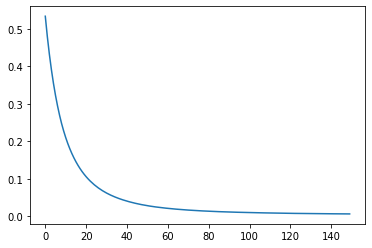

In [68]:
plt.plot(mdl_history.history['mean_squared_error'])

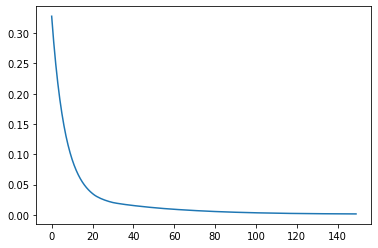

In [69]:
plt.plot(mdl_history.history['val_mean_squared_error'])

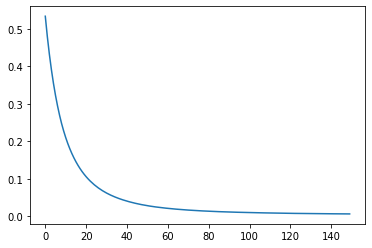

In [70]:
plt.plot(mdl_history.history['loss'])

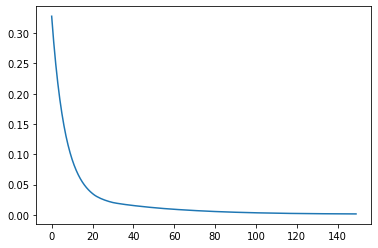

In [71]:
plt.plot(mdl_history.history['val_loss'])

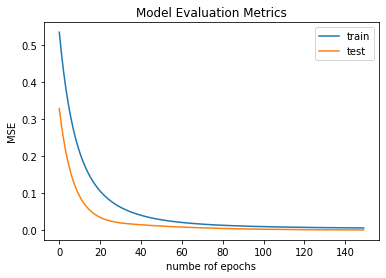

In [72]:
plt.plot(mdl_history.history['mean_squared_error'])
plt.plot(mdl_history.history['val_mean_squared_error'])
plt.title('Model Evaluation Metrics')
plt.xlabel('numbe rof epochs')
plt.ylabel('MSE')
plt.legend(['train', 'test'], loc = 'upper right')


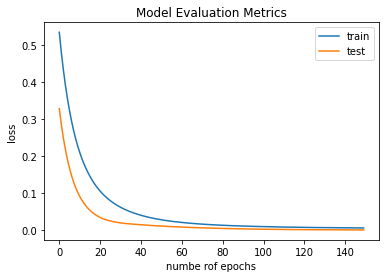

In [73]:
plt.plot(mdl_history.history['loss'])
plt.plot(mdl_history.history['val_loss'])
plt.title('Model Evaluation Metrics')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper right')